<a href="https://colab.research.google.com/github/Deiv101/Time_Series_Analysis/blob/main/FE_MScFE610_GWP_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1><b>Best Practices Handbook</b></h1></center>

# **Part 1: Distribution Asymmetry: Skewness**

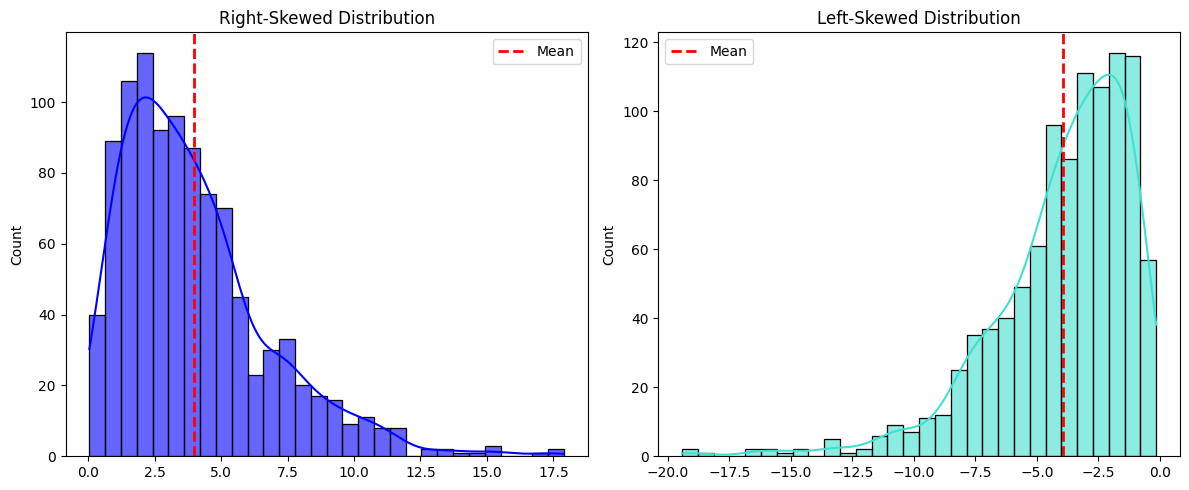

In [ ]:
# Import necessary libraries
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Generate right-skewed (positively skewed) data using a gamma distribution
right_skewed_data = np.random.gamma(shape=2, scale=2, size=1000)

# Generate left-skewed (negatively skewed) data using an inverse gamma distribution
left_skewed_data = -np.random.gamma(shape=2, scale=2, size=1000)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot right-skewed data with KDE
sns.histplot(right_skewed_data, bins=30, color='blue', kde=True, alpha=0.6, edgecolor='black', ax=axes[0])
axes[0].set_title('Right-Skewed Distribution')
axes[0].axvline(np.mean(right_skewed_data), color='red', linestyle='dashed', linewidth=2, label='Mean')
axes[0].legend()

# Plot left-skewed data with KDE
sns.histplot(left_skewed_data, bins=30, color='turquoise', kde=True, alpha=0.6, edgecolor='black', ax=axes[1])
axes[1].set_title('Left-Skewed Distribution')
axes[1].axvline(np.mean(left_skewed_data), color='red', linestyle='dashed', linewidth=2, label='Mean')
axes[1].legend()

# Show the plots
plt.tight_layout()
plt.show()


_________

# **Part 2. Tail Risk and Time-Varying Volatility**


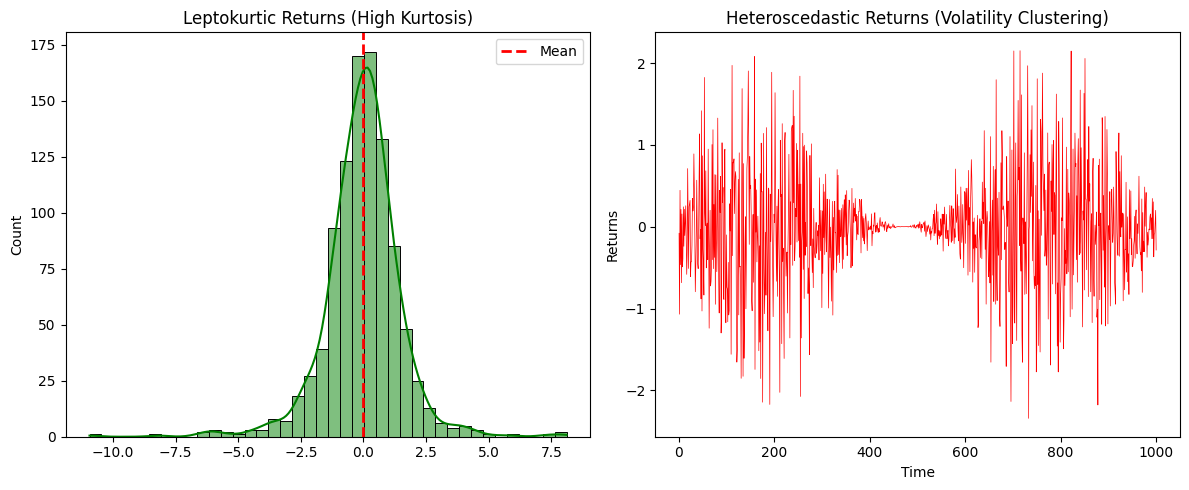

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Set seed for reproducibility
np.random.seed(42)

# Generate data with high kurtosis (leptokurtic distribution) - T-distributed returns
df = 3  # Degrees of freedom, lower df -> higher kurtosis
high_kurtosis_data = np.random.standard_t(df, size=1000)

# Simulate heteroscedasticity (volatility clustering using GARCH-like process)
time = np.arange(1, 1001)
volatility = 0.5 + 0.5 * np.sin(0.01 * time)  # Changing volatility over time
heteroscedastic_data = np.random.normal(0, volatility, size=1000)

# Create subplots for visualization
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# High Kurtosis Plot
sns.histplot(high_kurtosis_data, bins=40, kde=True, color='green', ax=axes[0])
axes[0].set_title("Leptokurtic Returns (High Kurtosis)")
axes[0].axvline(np.mean(high_kurtosis_data), color='red', linestyle='dashed', linewidth=2, label='Mean')
axes[0].legend()

# Heteroscedasticity Plot
axes[1].plot(time, heteroscedastic_data, color='red', linewidth=.5)
axes[1].set_title("Heteroscedastic Returns (Volatility Clustering)")
axes[1].set_xlabel("Time")
axes[1].set_ylabel("Returns")

plt.tight_layout()
plt.show()

___
# **PART 3: . Managing the Impact of Outliers**


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
       Date       DXY    METALS       OIL    US_STK  INTL_STK   X13W_TB  \
0  1/4/2016  0.002433  0.024283 -0.007559 -0.013980 -0.019802  0.047297   
1  1/5/2016  0.005361 -0.004741 -0.021491  0.001691 -0.001263  0.322581   
2  1/6/2016 -0.002213  0.013642 -0.055602 -0.012614 -0.015171  0.000000   
3  1/7/2016 -0.009679  0.035249 -0.020606 -0.023992 -0.019255 -0.073171   
4  1/8/2016  0.003258 -0.028064 -0.003306 -0.010977 -0.010471  0.000000   

   X10Y_TBY    EURUSD  YEAR  
0 -0.010577 -0.007316  2016  
1  0.001336 -0.002436  2016  
2 -0.031584 -0.006978  2016  
3 -0.011024  0.002512  2016  
4 -0.010683  0.013636  2016  

Outliers based on Z-score method:
           Date       DXY    METALS       OIL    US_STK  INTL_STK   X13W_TB  \
21    2/3/2016 -0.015981  0.081514  0.080321  0.005995  0.004470  0.009091   
105   6/3/2016 -0.016011  0.104278  0.000000 -0.

Text(0, 0.5, 'Dollar index returns')

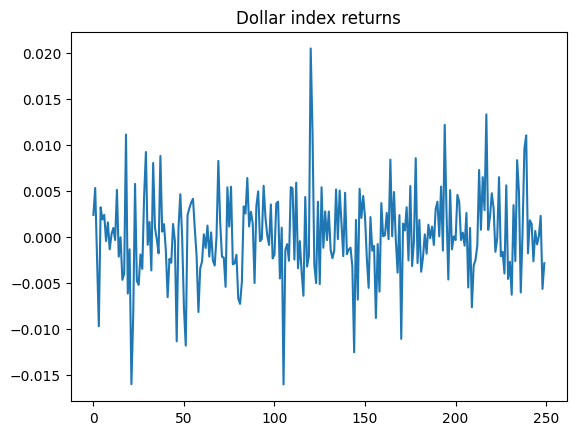

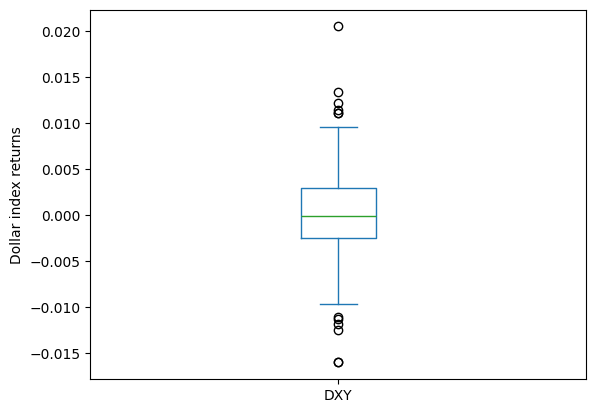

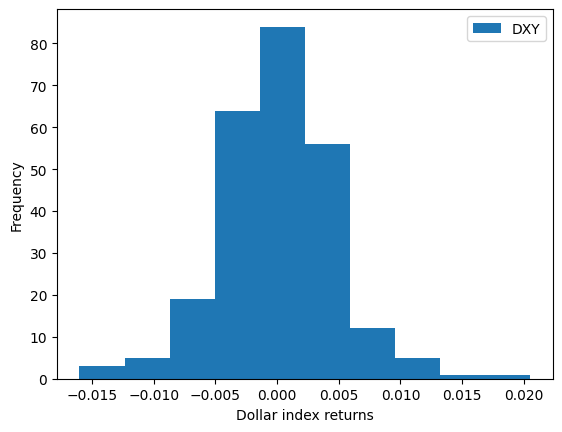

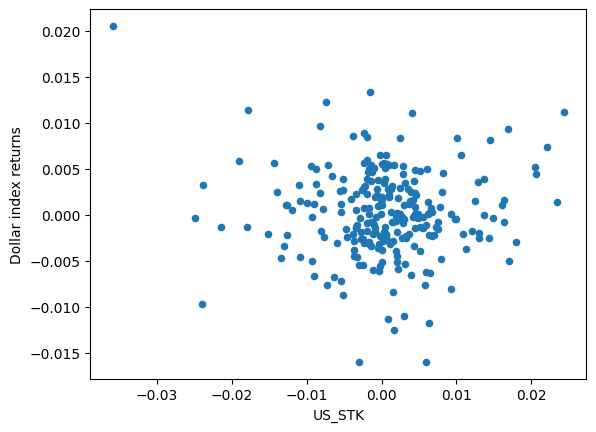

In [10]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import zscore
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')
import os
#os.listdir('/content/drive/My Drive')

data = pd.read_csv('/content/drive/My Drive/WQU/M2_module_2_data.csv')

# view first five entries
print(data.head())

# Compute the Z-score for the 'DXY' column
# The Z-score measures how many standard deviations each value is from the mean
data['Z-score'] = zscore(data['DXY'])

# Identify outliers where the absolute Z-score is greater than 3
# A Z-score beyond ±3 is considered an outlier in a normal distribution
outliers_z = data[data['Z-score'].abs() > 3]

# Call outliers
print("\nOutliers based on Z-score method:\n", outliers_z)

# Get first 20 Z-Scores
data["Z-score"].head(20)

# Plot Index Returns
data["DXY"].plot()
plt.title("Dollar index returns")

# Plot boxplots
data.plot.box(column="DXY")
plt.ylabel("Dollar index returns")

# Plot Histograms
data.plot.hist(column="DXY")
plt.xlabel("Dollar index returns")

# Plot scatter plots
data.plot.scatter(x="US_STK", y="DXY")
plt.ylabel("Dollar index returns")

# **Part 4: Analyzing Non-Stationary Time Series and Detecting Unit Roots**


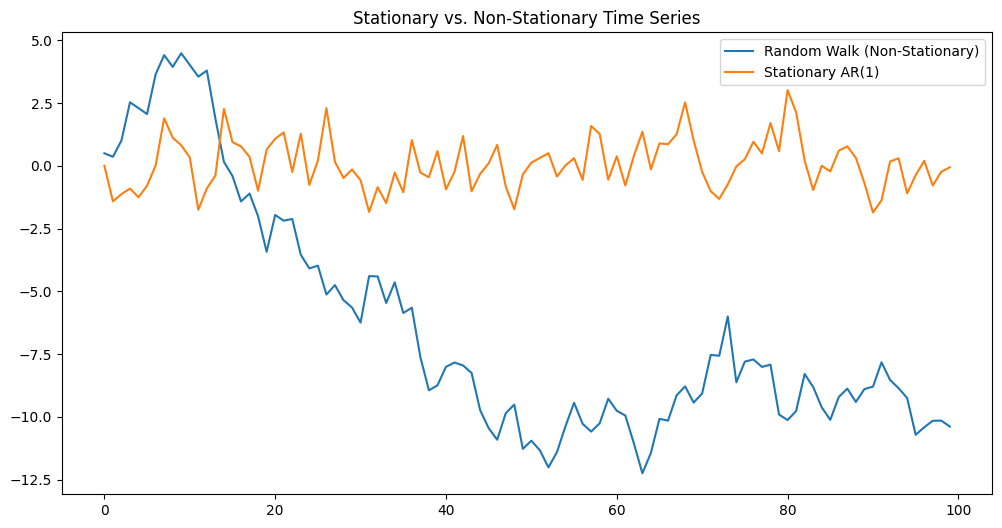

ADF Statistic: -1.358332
p-value: 0.602081
ADF Statistic: -6.589104
p-value: 0.000000


In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Simulate a random walk (non-stationary)
np.random.seed(42)
random_walk = np.cumsum(np.random.normal(0, 1, 100))

# Simulate a stationary AR(1) process
stationary_ar = [0]
for i in range(99):
    stationary_ar.append(0.5 * stationary_ar[-1] + np.random.normal(0, 1))


# Create pandas Series
rw_series = pd.Series(random_walk)
ar_series = pd.Series(stationary_ar)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(rw_series, label='Random Walk (Non-Stationary)')
plt.plot(ar_series, label='Stationary AR(1)')
plt.title('Stationary vs. Non-Stationary Time Series')
plt.legend()
plt.show()

# ADF Test for random walk
result = adfuller(rw_series)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

# ADF Test for AR process
result = adfuller(ar_series)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
